In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3328,ham,Sac will score big hundred.he is set batsman:-),NaN,NaN,NaN
1085,ham,FR'NDSHIP is like a needle of a clock. Though ...,NaN,NaN,NaN
1998,ham,"Well, I have to leave for my class babe ... Yo...",NaN,NaN,NaN
3490,ham,Ok.,NaN,NaN,NaN
714,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN


In [4]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

#### Total Steps in the project:
1. Data Cleaning
2. EDA
3. Text preprocessing
4. Mdel building
5. Evaluation
6. Improvements
7. Website
8. Deployment

### 1. Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Looking at the columns with index 2,3,4, We observe that a lot of the data is missing. Thus, we will drop these columns

In [7]:
data = data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

# Insted of doing this, you can use inplace = True 
# data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.rename(columns = {'v1': 'target', 'v2':'text'}, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
data['target'] = encoder.fit_transform(data['target'])

In [13]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
data.duplicated().sum()

403

In [16]:
data = data.drop_duplicates(keep = 'first')

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

Here we are done with the basic cleaning task. Now, we will start with EDA. 

### 2. EDA

In [19]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

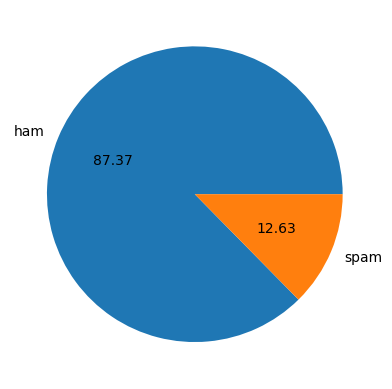

In [22]:
plt.pie(data['target'].value_counts()  , labels = ['ham','spam'], autopct='%0.2f')
plt.show()

This suggests that there is an imbalance between the data.

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cadmus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We can get an email and create 3 columns, number of characters, number of words, number of sentances.

In [25]:
data['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
data['num_characters'] = data['text'].apply(len)

In [27]:
data['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [29]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
data['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [31]:
data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [32]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# finding distribution of ham_messages
ham_messages = data[data['target']==0]

In [35]:
ham_messages[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# finding distribution of ham_messages
spam_messages = data[data['target']==1]

In [37]:
spam_messages[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

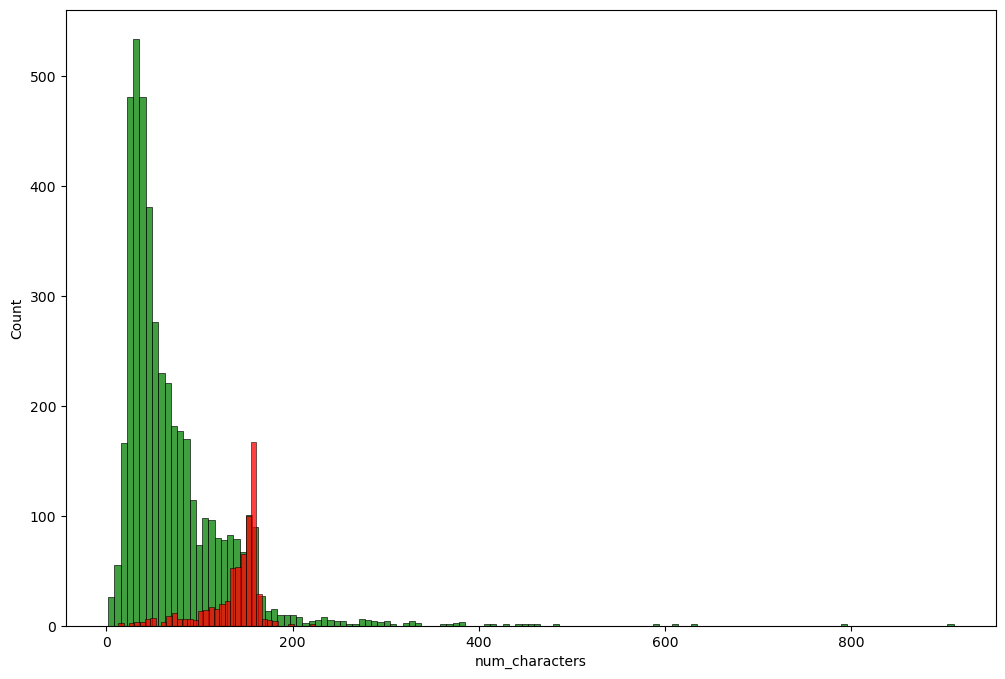

In [39]:
plt.figure(figsize=(12, 8))
sns.histplot(ham_messages['num_characters'], color = 'green')
sns.histplot(spam_messages['num_characters'], color = 'red')
plt.show()

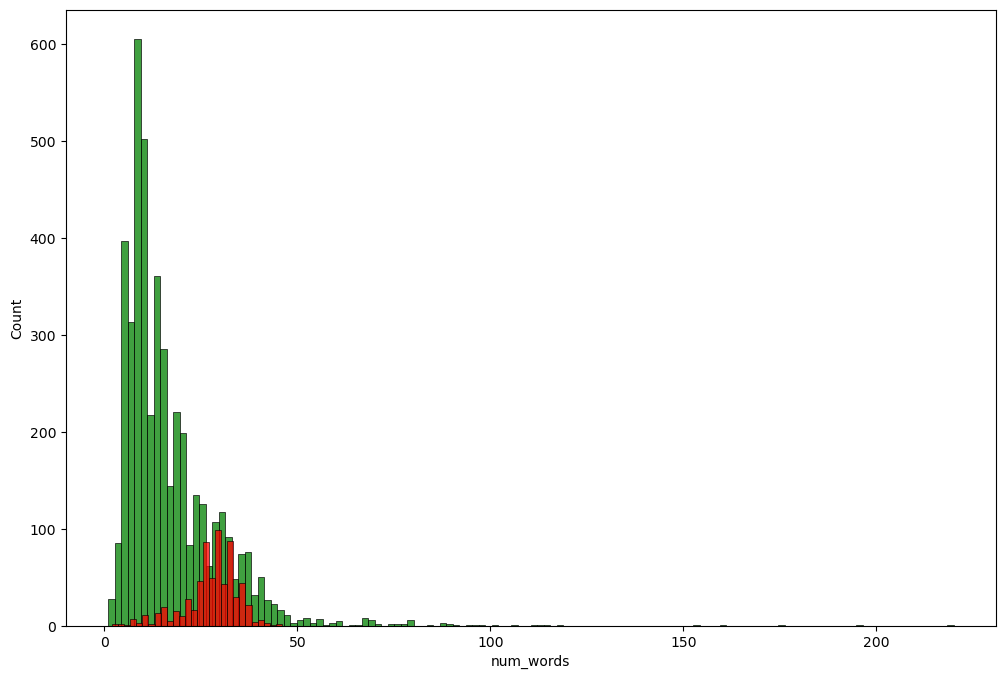

In [40]:
plt.figure(figsize=(12, 8))
sns.histplot(ham_messages['num_words'], color = 'green')
sns.histplot(spam_messages['num_words'], color = 'red')
plt.show()

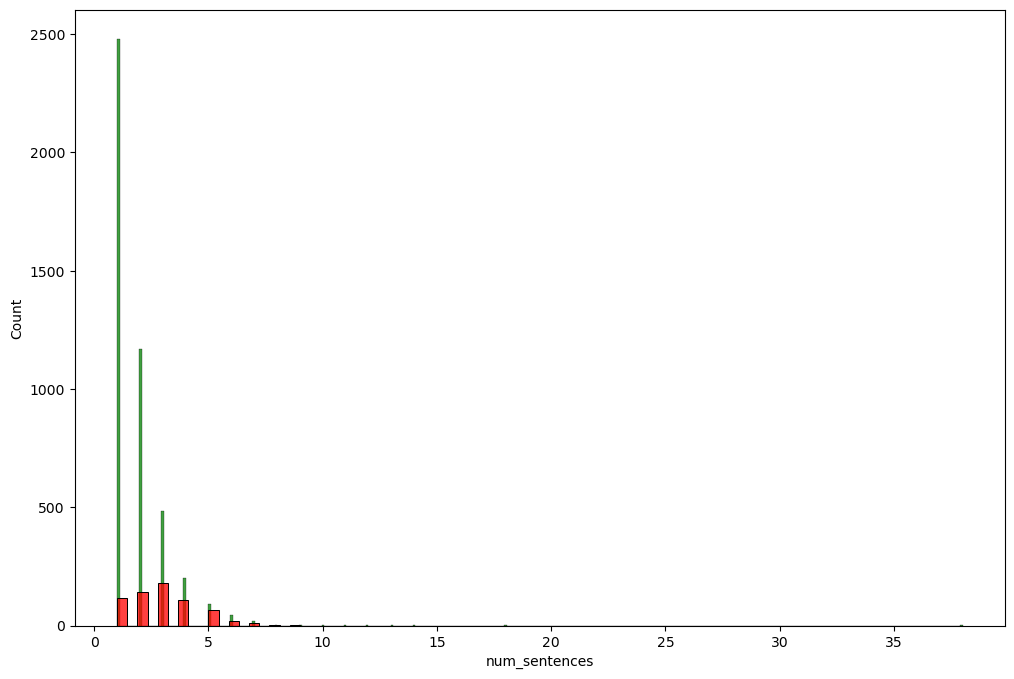

In [41]:
plt.figure(figsize=(12, 8))
sns.histplot(ham_messages['num_sentences'], color = 'green')
sns.histplot(spam_messages['num_sentences'], color = 'red')
plt.show()

C:\Users\Cadmus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


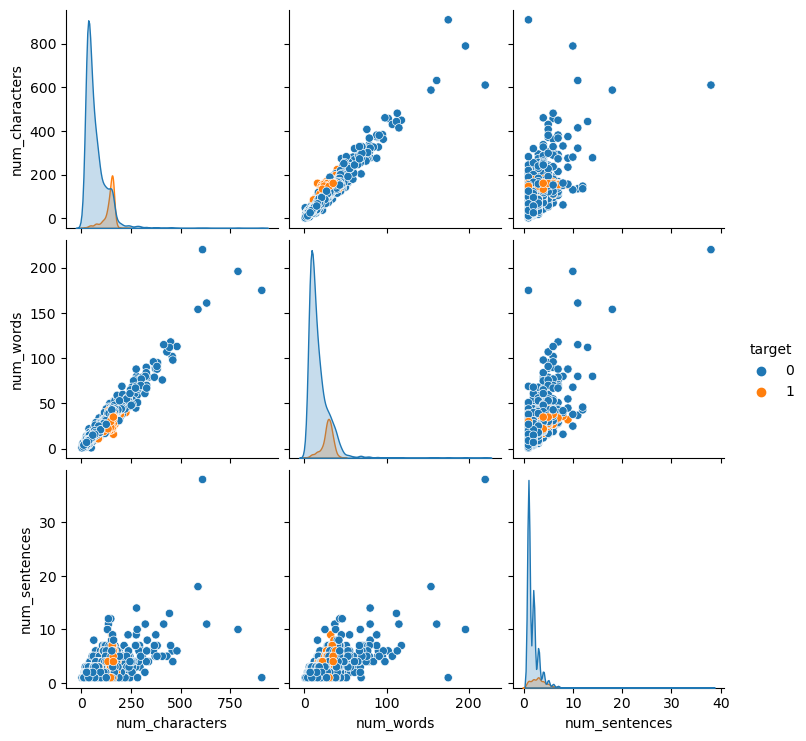

In [42]:
sns.pairplot(data, hue='target')

In [43]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
data[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

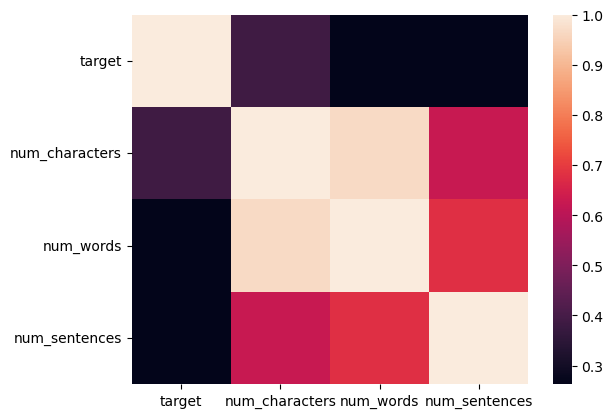

In [45]:
sns.heatmap(data[['target', 'num_characters', 'num_words', 'num_sentences']].corr())

<Axes: >

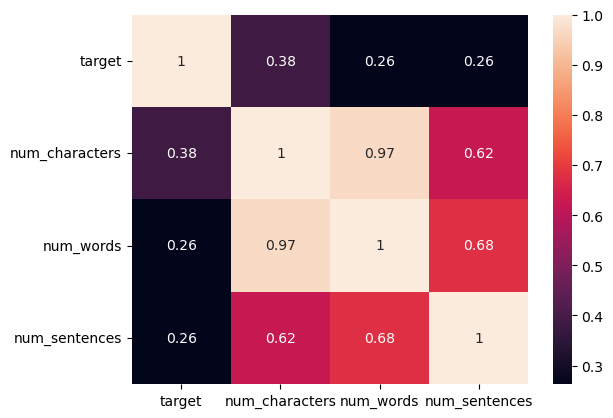

In [46]:
sns.heatmap(data[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

## Data Preprocessing

- Lower Case
- Tokenization
- Removing special characters
- removing stop words and punctuation
- stemming

In [47]:
from nltk.corpus import stopwords

In [48]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
import string

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
### Stemming
from nltk.stem.porter import PorterStemmer

In [52]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return " ".join(y)

In [54]:
transform_text('Harsh, How are you Buddy? Raj went to startbucks for drinking coffee. I really liked the yourtube lectures on the machine learning.')

'harsh buddi raj went startbuck drink coffe realli like yourtub lectur machin learn'

In [55]:
transform_text(data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [56]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [57]:
data['transformed_text'] = data['text'].apply(transform_text)

In [58]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
# !pip install wordcloud

In [60]:
from wordcloud import WordCloud

In [61]:
wc = WordCloud(width = 500, height= 500, min_font_size= 10, background_color= 'white')

In [62]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

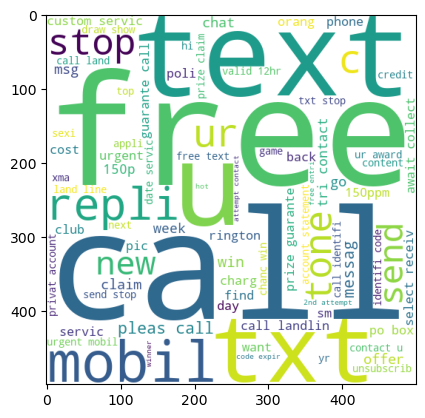

In [63]:
plt.imshow(spam_wc)

In [64]:
ham_wc =  wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

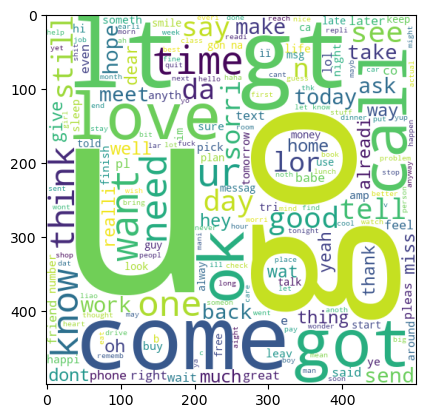

In [65]:
plt.imshow(ham_wc)

In [66]:
#spam messages
data[data['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [67]:
#spam messages
spam_corpus = []
for message in data[data['target'] == 1]['transformed_text'].tolist():
#     print(message)
    for word in message.split():
        spam_corpus.append(word)

In [68]:
len(spam_corpus)

9939

In [69]:
from collections import Counter

In [70]:
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [71]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

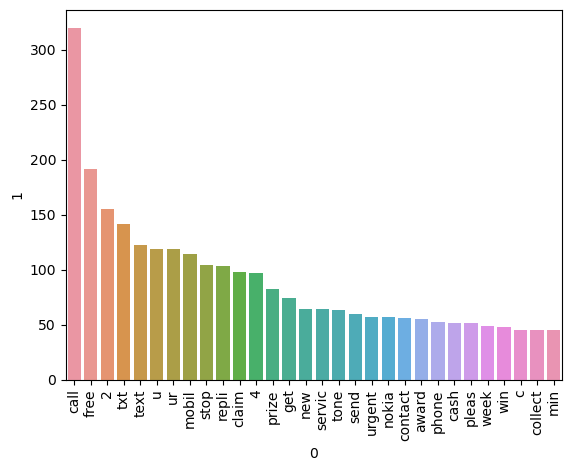

In [72]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [73]:
#spam messages
ham_corpus = []
for message in data[data['target'] == 0]['transformed_text'].tolist():
#     print(message)
    for word in message.split():
        ham_corpus.append(word)

In [74]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

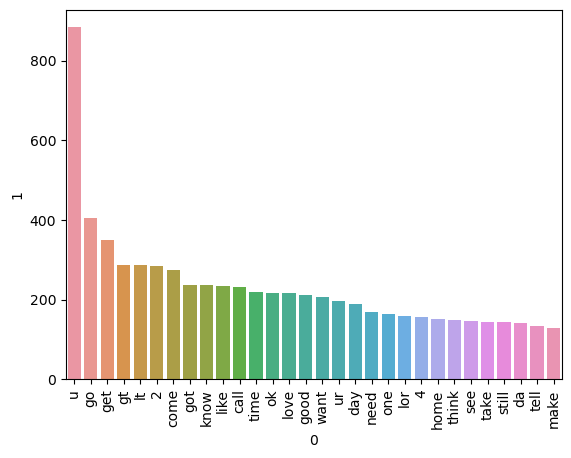

In [75]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Naive Bayes

# 4. Model Building

In [76]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
cv = CountVectorizer()

In [79]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [80]:
X.shape

(5169, 6708)

In [81]:
y = data['target']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [85]:
gnb = GaussianNB()

In [86]:
mnb = MultinomialNB()

In [87]:
bnb = BernoulliNB()

In [88]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [89]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [90]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tfidf = TfidfVectorizer()

In [93]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [94]:
y = data['target']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [97]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [98]:
gnb = GaussianNB()

In [99]:
mnb = MultinomialNB()

In [100]:
bnb = BernoulliNB()

In [101]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [102]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [103]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [104]:
# We have choosed tfidf with Multinomial Naive Bayes

Let's try some different algorithms.

In [105]:
!pip install xgboost

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [107]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [108]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB':mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [109]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [110]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For ', name)
    print("Accuracy : ", current_accuracy)
    print("Precision : ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy :  0.971953578336557
Precision :  0.9393939393939394
For  KN
Accuracy :  0.8965183752417795
Precision :  1.0
For  NB
Accuracy :  0.9613152804642167
Precision :  0.9906542056074766
For  DT
Accuracy :  0.9342359767891683
Precision :  0.8130081300813008
For  LR
Accuracy :  0.9439071566731141
Precision :  0.865546218487395
For  RF
Accuracy :  0.9700193423597679
Precision :  0.9913793103448276
For  AdaBoost
Accuracy :  0.9477756286266924
Precision :  0.8421052631578947
For  BgC
Accuracy :  0.9613152804642167
Precision :  0.8776978417266187
For  ETC
Accuracy :  0.9738878143133463
Precision :  0.9916666666666667
For  GBDT
Accuracy :  0.9506769825918762
Precision :  0.9519230769230769
For  xgb
Accuracy :  0.9748549323017408
Precision :  0.968503937007874


In [111]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

performance_df.sort_values('Precision', ascending = False, inplace=True)

In [112]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,xgb,0.974855,0.968504
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [114]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.947776


C:\Users\Cadmus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


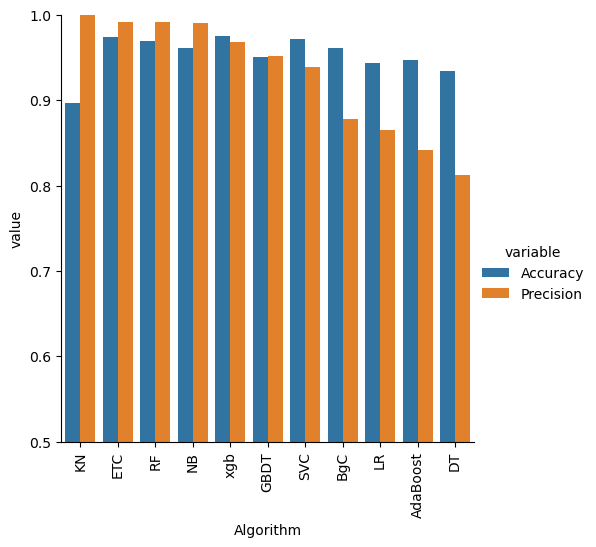

In [115]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable',
           data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

#### model improvement
#### 1. Change the max_features parameters of tfidf

In [116]:
tfidf3000 = TfidfVectorizer(max_features = 3000)

In [117]:
X = tfidf3000.fit_transform(data['transformed_text']).toarray()

In [118]:
y = data['target']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [121]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [122]:
gnb = GaussianNB()

In [123]:
mnb = MultinomialNB()

In [124]:
bnb = BernoulliNB()

In [125]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [126]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [127]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [128]:
# We have choosed tfidf with Multinomial Naive Bayes

Let's try some different algorithms.

In [129]:
!pip install xgboost

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [132]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB':mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [133]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [134]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For ', name)
    print("Accuracy : ", current_accuracy)
    print("Precision : ", current_precision)
    
    accuracy_scores_3000.append(current_accuracy)
    precision_scores_3000.append(current_precision)

For  SVC
Accuracy :  0.97678916827853
Precision :  0.9548872180451128
For  KN
Accuracy :  0.9042553191489362
Precision :  1.0
For  NB
Accuracy :  0.9729206963249516
Precision :  0.9915966386554622
For  DT
Accuracy :  0.9332688588007737
Precision :  0.8275862068965517
For  LR
Accuracy :  0.9468085106382979
Precision :  0.8688524590163934
For  RF
Accuracy :  0.971953578336557
Precision :  0.9754098360655737
For  AdaBoost
Accuracy :  0.9506769825918762
Precision :  0.8671875
For  BgC
Accuracy :  0.9622823984526112
Precision :  0.8840579710144928
For  ETC
Accuracy :  0.9777562862669246
Precision :  0.9841269841269841
For  GBDT
Accuracy :  0.9468085106382979
Precision :  0.96875
For  xgb
Accuracy :  0.9680851063829787
Precision :  0.9375


In [135]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Accuracy_3000':accuracy_scores_3000, 'Precision_3000':precision_scores_3000})

performance_df.sort_values('Precision', ascending = False, inplace=True)

In [136]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
1,KN,0.896518,1.000000,0.904255,1.000000
8,ETC,0.973888,0.991667,0.977756,0.984127
5,RF,0.970019,0.991379,0.971954,0.975410
2,NB,0.961315,0.990654,0.972921,0.991597
10,xgb,0.974855,0.968504,0.968085,0.937500
9,GBDT,0.950677,0.951923,0.946809,0.968750
0,SVC,0.971954,0.939394,0.976789,0.954887
7,BgC,0.961315,0.877698,0.962282,0.884058
4,LR,0.943907,0.865546,0.946809,0.868852
6,AdaBoost,0.947776,0.842105,0.950677,0.867188


In [137]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [138]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.947776


C:\Users\Cadmus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


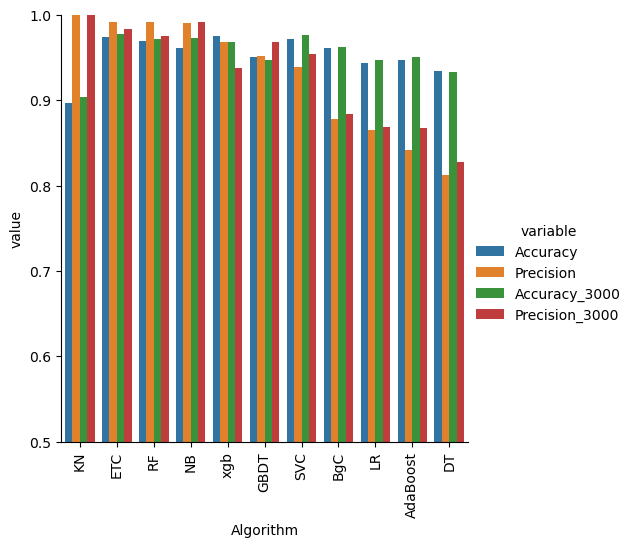

In [139]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable',
           data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [140]:
# voting Classifier
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)


In [141]:
from sklearn.ensemble import VotingClassifier

In [148]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb),('etc', etc)], voting='soft')

In [149]:
tfidf3000 = TfidfVectorizer(max_features = 3000)

In [150]:
X = tfidf3000.fit_transform(data['transformed_text']).toarray()

In [151]:
y = data['target']

In [152]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [153]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [154]:
y_pred = voting.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9921875


In [155]:
# Applying Stacking
estimators = [('svm', svc), ('nb', mnb),('etc', etc)]
final_estimators = RandomForestClassifier()

In [156]:
from sklearn.ensemble import StackingClassifier

In [157]:
stc = StackingClassifier(estimators = estimators, final_estimator=final_estimators)

In [158]:
stc.fit(X_train, y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [159]:
y_pred = stc.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.95


In [160]:
import pickle

In [161]:
pickle.dump(tfidf3000, open('vectorizer.pkl', 'wb'))


In [163]:
pickle.dump(voting, open('model.pkl', 'wb'))